In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Read the myopia csv file
df = pd.read_csv('/Users/anthonygarcia/desktop/Unsupervised-machine-learning-challenge/resources/myopia.csv')
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
# Drop the MYOPIC column
df2 = df.drop(['MYOPIC'], axis=1)
labels = df['MYOPIC']

In [4]:
 # Find null values
for column in df2.columns:
    print(f"Column {column} has {df2[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [5]:
# Find duplicate entries
print(f"Duplicate entries: {df2.duplicated().sum()}")

Duplicate entries: 0


In [6]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2) 

# There are 14 columns/features in the dataset
scaled_data[0]


array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

# PCA Dimension Reduction

In [7]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the data.
df_pca = pca.fit_transform(scaled_data) 

In [8]:
 # Get the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [9]:
# Sum of explained variance
pca.explained_variance_ratio_.sum()

0.9187361702915187

# t-SNE

In [10]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [11]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca) 

In [12]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

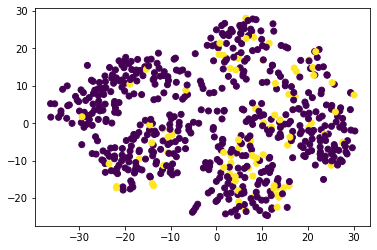

In [13]:
#Plot the t-SNE output
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)

# Create a scatter plot of the t-SNE output. Are there distinct clusters?

- After performing the t-SNE, there was no supportive evidence of clusters. 
 

# k-means

In [14]:
# For loop to determine the inertia for k

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

In [15]:
# Create a DF to use for elbow curve 
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


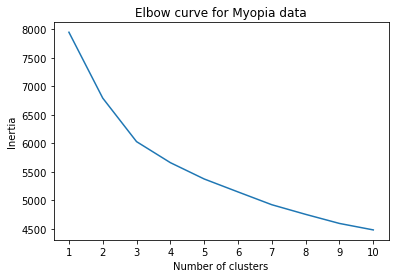

In [16]:
# Plot the elbow curve to find the best number of clusters for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia data')
plt.show()

In [17]:
# Create a dataframe from PCA model for K-Means model and plot
df_myopia = pd.DataFrame(data=df_pca, columns=["principal component 1", "principal component 2",
                                                                "principal component 3","principal component 4",
                                                                 "principal component 5","principal component 6",
                                                                 "principal component 7",
                                                                 "principal component 8","principal component 9",
                                                                 "principal component 10"])
df_myopia.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [18]:
# Initiate K-Means model, train, predict and return to a dataframe
def get_clusters(k, data):
    
    model = KMeans(n_clusters=k, random_state=0)

    
    model.fit(data)

    
    predictions = model.predict(data)

    
    data["class"] = model.labels_

    return data

In [19]:
clusters = get_clusters(3, df_myopia)
clusters

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1
...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,0
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,1
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,1
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,0


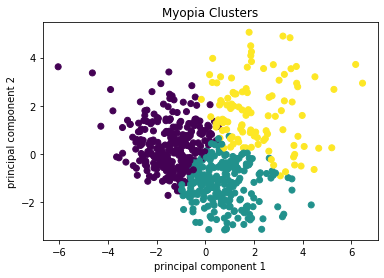

In [20]:
# Variables for plot
x=clusters['principal component 1']
y=clusters['principal component 2']

# Plot the Clusters
plt.scatter(x=x, y=y, c=clusters['class'])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('Myopia Clusters')
plt.show()


# If possible, determine where the elbow of the plot is, and at which value of k it appears.

- By looking at the elbow plot it appears that the k value is 3.

# Recommendation

My recommendation is that the dataset needs to be larger to be able to make a better prediction to determine any signs of myopia. Once containing a larger dataset the data could be split into test and training models followed by applying the same models used in this prediction to be able to create a more accurate prediction. 


